In [41]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import numpy as np
from scipy.signal import convolve2d

(np.float64(-0.5), np.float64(899.5), np.float64(599.5), np.float64(-0.5))

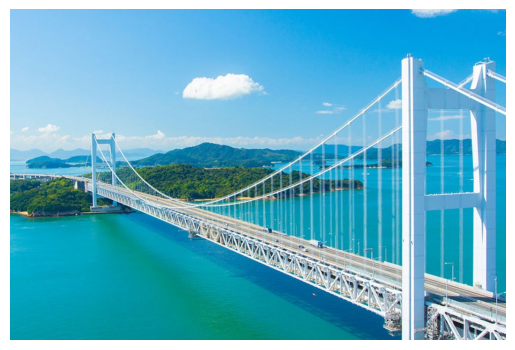

In [65]:
image=cv2.imread('images/Bridge2.jpg')
ima=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(ima)
plt.axis('off')

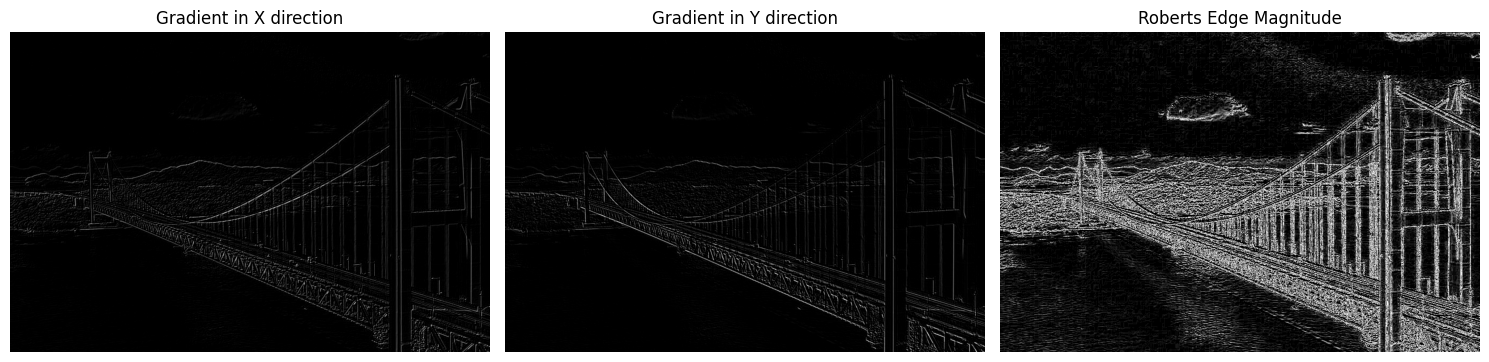

In [63]:

# Define Roberts Cross kernels
kernel_x = np.array([[1, 0], [0, -1]], dtype=float)
kernel_y = np.array([[0, 1], [-1, 0]], dtype=float)

# Apply convolution using filter2D
grad_x = cv2.filter2D(image, -1, kernel_x)
grad_y = cv2.filter2D(image, -1, kernel_y)

# Compute edge magnitude
edge_magnitude = np.sqrt(grad_x**2 + grad_y**2)
edge_magnitude = np.uint8(np.absolute(edge_magnitude))

# Plot results using subplot
plt.figure(figsize=(15, 5))

# X Gradient
plt.subplot(1, 3, 1)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')
# Y Gradient
plt.subplot(1, 3, 2)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')
# Combined Edge Magnitude
plt.subplot(1, 3, 3)
plt.imshow(edge_magnitude, cmap='gray')
plt.title('Roberts Edge Magnitude')
plt.axis('off')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


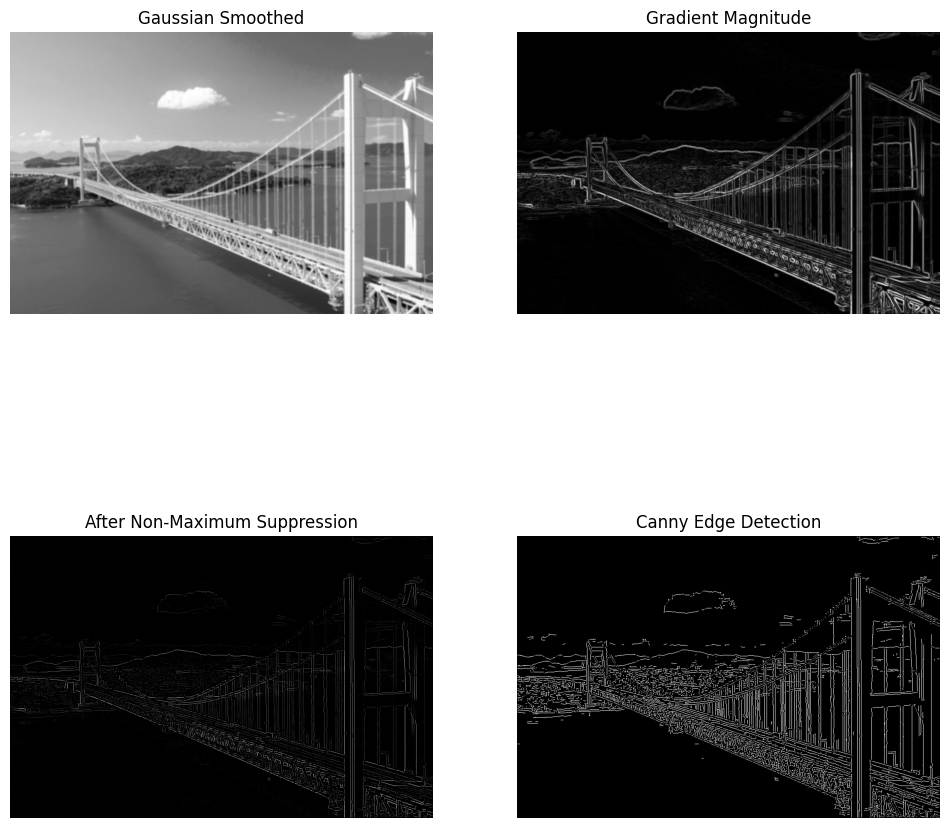

In [38]:

smoothed_image = cv2.GaussianBlur(image, (5, 5), 1.4)

sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3) 
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3) 

magnitude = np.sqrt(sobel_x**2 + sobel_y**2) 
direction = np.arctan2(sobel_y, sobel_x)  

nms_image = np.zeros_like(magnitude)
for i in range(1, magnitude.shape[0] - 1):
    for j in range(1, magnitude.shape[1] - 1):
        angle = direction[i, j] * 180.0 / np.pi
        if angle < 0:
            angle += 180

        if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
            neighbor1 = magnitude[i, j + 1]
            neighbor2 = magnitude[i, j - 1]
        elif (22.5 <= angle < 67.5):
            neighbor1 = magnitude[i + 1, j - 1]
            neighbor2 = magnitude[i - 1, j + 1]
        elif (67.5 <= angle < 112.5):
            neighbor1 = magnitude[i + 1, j]
            neighbor2 = magnitude[i - 1, j]
        elif (112.5 <= angle < 157.5):
            neighbor1 = magnitude[i - 1, j - 1]
            neighbor2 = magnitude[i + 1, j + 1]

        if magnitude[i, j] >= neighbor1 and magnitude[i, j] >= neighbor2:
            nms_image[i, j] = magnitude[i, j]
        else:
            nms_image[i, j] = 0

high_threshold = np.max(nms_image) * 0.1
low_threshold = high_threshold * 0.5

final_edges = np.zeros_like(nms_image)
strong_edges = (nms_image > high_threshold)
weak_edges = (nms_image >= low_threshold) & (nms_image <= high_threshold)

final_edges[strong_edges] = 255

for i in range(1, final_edges.shape[0] - 1):
    for j in range(1, final_edges.shape[1] - 1):
        if weak_edges[i, j]:
            if np.any(final_edges[i - 1:i + 2, j - 1:j + 2] == 255):
                final_edges[i, j] = 255

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1), plt.imshow(smoothed_image, cmap='gray'), plt.title('Gaussian Smoothed'),plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(magnitude, cmap='gray'), plt.title('Gradient Magnitude'),plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(nms_image, cmap='gray'), plt.title('After Non-Maximum Suppression'),plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(final_edges, cmap='gray'), plt.title('Canny Edge Detection'),plt.axis('off')
plt.show()


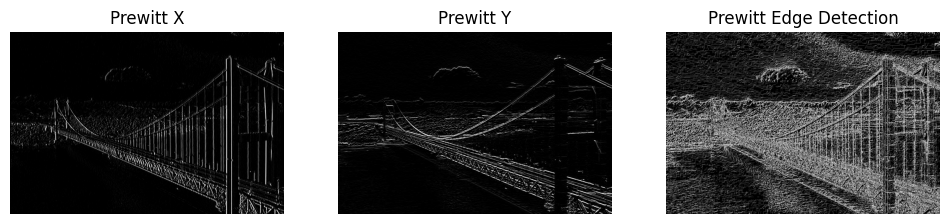

In [37]:


# Define Prewitt kernels
prewitt_x = np.array([[-1, 0, 1], 
                       [-1, 0, 1], 
                       [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1], 
                       [0, 0, 0], 
                       [1, 1, 1]])

# Apply Prewitt filters
grad_x = cv2.filter2D(image, -1, prewitt_x)
grad_y = cv2.filter2D(image, -1, prewitt_y)

# Compute gradient magnitude
prewitt_edges = np.sqrt(grad_x**2 + grad_y**2)
prewitt_edges = (prewitt_edges / np.max(prewitt_edges) * 255).astype(np.uint8)  # Normalize to 0-255

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(grad_x, cmap='gray'), plt.title('Prewitt X'),plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(grad_y, cmap='gray'), plt.title('Prewitt Y'),plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(prewitt_edges, cmap='gray'), plt.title('Prewitt Edge Detection'),plt.axis('off')
plt.show()


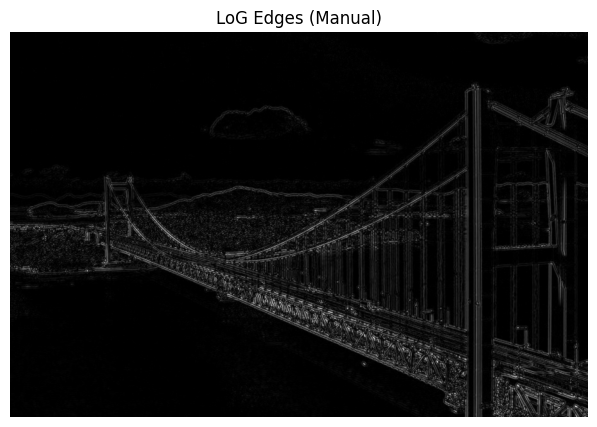

In [59]:


# Define a Gaussian kernel (5x5)
gaussian_kernel = np.array([[1,  4,  7,  4, 1],
                            [4, 16, 26, 16, 4],
                            [7, 26, 41, 26, 7],
                            [4, 16, 26, 16, 4],
                            [1,  4,  7,  4, 1]]) / 273  # Normalized

# Apply Gaussian Blur manually using convolution
blurred = convolve2d(image, gaussian_kernel, mode='same', boundary='symm')

# Define the Laplacian kernel
laplacian_kernel = np.array([[ 0,  1,  0],
                              [ 1, -4,  1],
                              [ 0,  1,  0]])

# Apply Laplacian filter manually using convolution
log_edges = convolve2d(blurred, laplacian_kernel, mode='same', boundary='symm')

# Normalize the edges to 0-255
log_edges = np.abs(log_edges)
log_edges = (log_edges / np.max(log_edges) * 255).astype(np.uint8)

# Display results
plt.figure(figsize=(12, 5))
plt.imshow(log_edges, cmap='gray'), plt.title('LoG Edges (Manual)'),plt.axis('off')
plt.show()


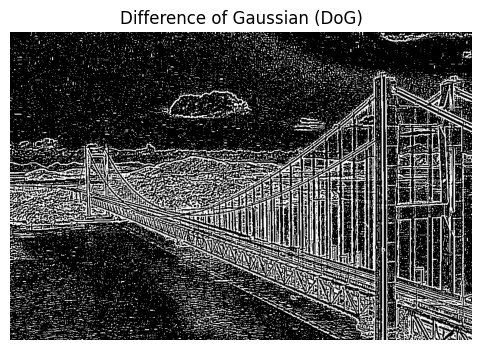

In [60]:
sigma1 = 1.0  # Smaller sigma for the first Gaussian blur
sigma2 = 2.0  # Larger sigma for the second Gaussian blur

# Apply Gaussian blurs
gaussian1 = cv2.GaussianBlur(image, (5, 5), sigma1)
gaussian2 = cv2.GaussianBlur(image, (5, 5), sigma2)

# Step 3: Calculate the Difference of Gaussian (DoG)
dog_image = gaussian1 - gaussian2

# Step 4: Thresholding the DoG image (optional, to highlight edges)

# Step 5: Display the results
plt.figure(figsize=(6, 4))
plt.imshow(dog_image, cmap='gray'), plt.title('Difference of Gaussian (DoG)'),plt.axis('off')
plt.show()


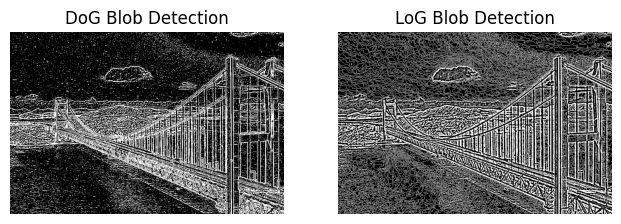

In [61]:
sigma1 = 1.0  # Smaller sigma for first Gaussian
sigma2 = 2.0  # Larger sigma for second Gaussian

# Apply Gaussian blurs
gaussian1 = cv2.GaussianBlur(image, (5, 5), sigma1)
gaussian2 = cv2.GaussianBlur(image, (5, 5), sigma2)

# Step 3: Difference of Gaussian (DoG)
dog_image = gaussian1 - gaussian2

# Threshold the DoG result to detect blobs
_, dog_thresholded = cv2.threshold(dog_image, 10, 255, cv2.THRESH_BINARY)

# Step 4: Apply Laplacian of Gaussian (LoG) for blob detection
# Apply Gaussian blur first with a certain sigma value
log_blur = cv2.GaussianBlur(image, (5, 5), 2.0)
log_laplacian = cv2.Laplacian(log_blur, cv2.CV_64F)

# Threshold the LoG result
_, log_thresholded = cv2.threshold(log_laplacian, 0, 255, cv2.THRESH_BINARY)

# Step 5: Display results
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1), plt.imshow(dog_thresholded, cmap='gray'), plt.title('DoG Blob Detection'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(log_thresholded, cmap='gray'), plt.title('LoG Blob Detection'), plt.axis('off')

plt.show()